In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [10]:
%matplotlib inline

import itertools
from pathlib import Path
import random

import numpy as np
import matplotlib.pyplot as plt

from matplottoy.data import simplex
from matplottoy.encoders import (color, position)
from matplottoy.artists import point, line

import utils


spath = Path("../../../draft/figures/code/")

In [11]:
data = simplex.VertexSimplex(size=200)

In [12]:
data.view('vertex').keys()

dict_keys(['index', 'v1', 'v2', 'v3', 'v4'])

In [13]:
cmap =  color.Categorical({'true':'deeppink', 'false':'deepskyblue'})
transforms = {'y': ('v2', lambda x: x),       
              'x': ('v4', lambda x: x),
            'facecolors': ('v3', cmap), 
             's':(None ,lambda _: itertools.repeat(.02))}

In [14]:
def isNominal(values, encoder):
    m1 = list(zip(values, encoder(values)))
    random.shuffle(values)
    m2 = list(zip(values, encoder(values)))
    return sorted(m1) == sorted(m2)

In [15]:
values = ['true', 'false', 'true', 'false', 'false'] 
isNominal(['true', 'false', 'true', 'false', 'false'], cmap)

True

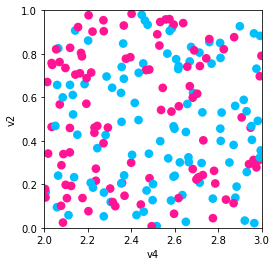

In [16]:
fig, ax = plt.subplots()

artist = point.Point(data, transforms)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = utils.mnx(data.FB.F[transforms['y'][0]]['range']), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')
fig.savefig(spath/"scatter_0.png")

[(2.0, 3.0), (0.0, 1.0), Text(0.5, 0, 'v4'), Text(0, 0.5, 'v2'), None]

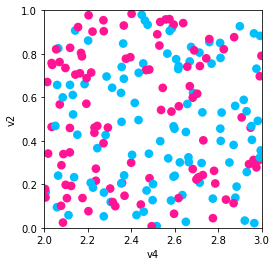

In [8]:
### fails on facecolors
fig, ax = plt.subplots()

artist = point.Point(data, transforms)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = utils.mnx(data.FB.F[transforms['y'][0]]['range']), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


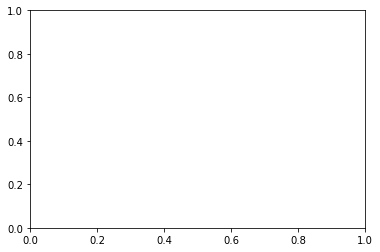

In [9]:
fig, ax = plt.subplots()
artist = line.Line(data, transforms)
